In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd

In [48]:
df = pd.read_csv("solar_system.csv")
print ("Shape: ", df.shape)
print ("20 rows 11 columns")
print ("\n First 5 rows: \n", df.head(5))
print ("\n Last 5 rows: \n", df.tail(5))
print ("\n Column names: \n", df.columns)

print ("\n Row names: \n",df["Attribute"])

Shape:  (20, 11)
20 rows 11 columns

 First 5 rows: 
                 Attribute Mercury  Venus  Earth   Moon   Mars Jupiter  Saturn  \
0          Mass (10^24kg)   0.330   4.87   5.97  0.073  0.642    1898     568   
1           Diameter (km)    4879  12104  12756   3475   6792  142984  120536   
2        Density (kg/m^3)    5429   5243   5514   3340   3934    1326     687   
3         Gravity (m/s^2)     3.7    8.9    9.8    1.6    3.7    23.1     9.0   
4  Escape Velocity (km/s)     4.3   10.4   11.2    2.4    5.0    59.5    35.5   

  Uranus Neptune   Pluto  
0   86.8     102  0.0130  
1  51118   49528    2376  
2   1270    1638    1850  
3    8.7    11.0     0.7  
4   21.3    23.5     1.3  

 Last 5 rows: 
                   Attribute Mercury Venus Earth Moon  Mars  Jupiter   Saturn  \
15     Mean Temperature (C)     167   464    15  -20   -65     -110     -140   
16  Surface Pressure (bars)       0    92     1    0  0.01  Unknown  Unknown   
17          Number of Moons       0     

In [49]:
orbit_period = df.loc[df["Attribute"] == "Orbital Period (days)"].iloc[0,1:].astype(float)

perihelion = df.loc[df["Attribute"] == "Perihelion (10^6 km)"].iloc[0,1:].astype(float)

aphelion = df.loc[df["Attribute"] == "Aphelion (10^6 km)"].iloc[0,1:].astype(float)

print("Orbital Period:\n", orbit_period)
print("\nPerihelion:\n", perihelion)
print("\nAphelion:\n", aphelion)

Orbital Period:
 Mercury       88.0
Venus        224.7
Earth        365.2
Moon          27.3
Mars         687.0
Jupiter     4331.0
Saturn     10747.0
Uranus     30589.0
Neptune    59800.0
Pluto      90560.0
Name: 10, dtype: float64

Perihelion:
 Mercury      46.000
Venus       107.500
Earth       147.100
Moon          0.363
Mars        206.700
Jupiter     740.600
Saturn     1357.600
Uranus     2732.700
Neptune    4471.100
Pluto      4436.800
Name: 8, dtype: float64

Aphelion:
 Mercury      69.800
Venus       108.900
Earth       152.100
Moon          0.406
Mars        249.300
Jupiter     816.400
Saturn     1506.500
Uranus     3001.400
Neptune    4558.900
Pluto      7375.900
Name: 9, dtype: float64


In [50]:
print ("Perihelion is the point of closest approach in the orbit to the sun")
print ("Aphelion is the point of farthest approach in the orbit to the sun")
print ("Semi major axis is half of the longest diameter")

Perihelion is the point of closest approach in the orbit to the sun
Aphelion is the point of farthest approach in the orbit to the sun
Semi major axis is half of the longest diameter


In [51]:
semi_major_axis = (perihelion + aphelion) / 2

In [52]:
print ("new shape: ", df.shape)
print ("21 rows 10 columns")


new shape:  (20, 11)
21 rows 10 columns


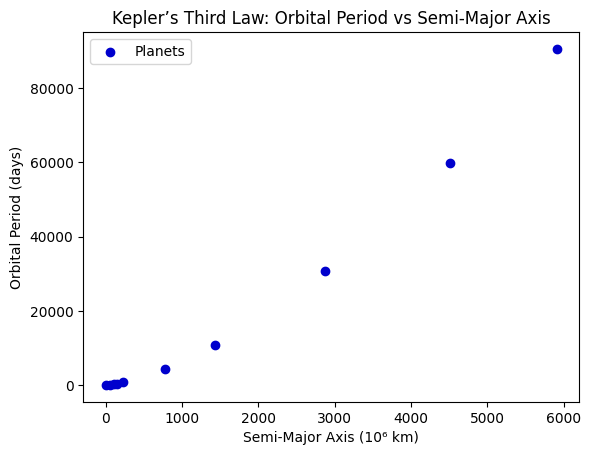

In [53]:
#semi_major_axis = df.loc["Semi-Major Axis (10^6 km)"].astype(float)
#orbital_period = df.loc["Orbital Period (days)"].astype(float)

plt.scatter(semi_major_axis, orbit_period, color='mediumblue', label='Planets')

plt.xlabel("Semi-Major Axis (10⁶ km)")
plt.ylabel("Orbital Period (days)")
plt.title("Kepler’s Third Law: Orbital Period vs Semi-Major Axis")

plt.legend()
plt.show()


In [54]:
def keplers_third_law(a, m):
    return m * a ** 1.5

In [55]:
popt, pcov = curve_fit(keplers_third_law, semi_major_axis, orbit_period) 
m_fit = popt[0]

print(f"Fit: y = {m_fit:.2f} * a^1.5")

Fit: y = 0.20 * a^1.5


In [56]:
P_model = keplers_third_law(semi_major_axis, m_fit)
residuals = orbit_period - P_model
chi2 = np.sum((residuals)**2)
dof = len(semi_major_axis) - 1
chi2_reduced = chi2 / dof
print(f"Reduced chi-squared: {chi2_reduced:.3f}")


Reduced chi-squared: 41276.706


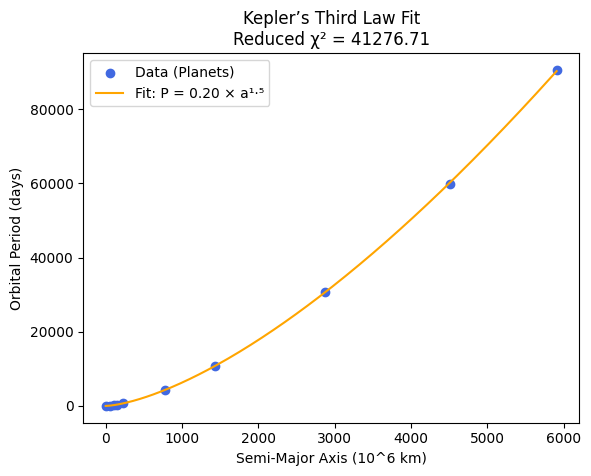

In [57]:
a_fit = np.linspace(min(semi_major_axis), max(semi_major_axis), 200)
P_fit = keplers_third_law(a_fit, m_fit)

plt.scatter(semi_major_axis, orbit_period, color='royalblue', label='Data (Planets)')
plt.plot(a_fit, P_fit, color='orange', label=f'Fit: P = {m_fit:.2f} × a¹·⁵')

plt.xlabel("Semi-Major Axis (10^6 km)")
plt.ylabel("Orbital Period (days)")
plt.title(f"Kepler’s Third Law Fit\nReduced χ² = {chi2_reduced:.2f}")
plt.legend()


plt.show()

In [58]:
df.to_csv("kepler.csv")
